### Feature Scaling

---


#### **1. Standardization (Z-score normalization)**

Converts a normal distribution to a standard normal distribution, with mean = 0, and standard_deviation=1.

Hence, useful for normally distributed data, though can be used on any data, since it does not change the distribution of the data.


Useful for linear models, so that the weights are not skewed due to unbalanced data.
Generally refers to scaling down (or up) the data points between the range of -3 to 3.

**It has no effect on Outliers.**

---


**z-score(xi) = (xi - mean(x)) / standard_deviation(x)**

It tells how many standard deviations an observation is from the mean of the data.

<img src = "../assets/z_score.png" alt = "z_score" />


If the data is normally distributed, it has the following distribution, with values lying in the range specified above.


<img src="../assets/normal_dist.png" alt="normal_dist" />

---


Now, mean(z-score) = 0, and standard_deviation(z-score) = 1

Since the mean of all the features has become zero, the graph shifts to the origin and hence it is also known as **mean centering**.

<img src="../assets/mean_centering.png" />

---


In [1]:
import pandas as pd
import os

path = os.path.join("..", "data", "sns_ads.csv")
df = pd.read_csv(path)
df.sample(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
203,15809347,Female,41,71000,0
128,15722758,Male,30,17000,0


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Purchased", axis=1), df["Purchased"]
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 4), (100, 4), (300,), (100,))

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("standard_scaler", StandardScaler(), ["Age", "EstimatedSalary"])],
    remainder="passthrough",
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard_scaler', StandardScaler(),
                                 ['Age', 'EstimatedSalary'])])

In [4]:
X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.transform(X_test)

In [5]:
X_train_trans.sample(2)

,standard_scaler__Age,standard_scaler__EstimatedSalary,remainder__User ID,remainder__Gender
67,-1.429806,0.293338,15654574,Female
352,0.408654,0.524921,15587419,Female


In [6]:
X_train_trans.describe()

,standard_scaler__Age,standard_scaler__EstimatedSalary,remainder__User ID
count,3.000000e+02,3.000000e+02,3.000000e+02
mean,2.842171e-16,-1.539509e-16,1.569190e+07
std,1.001671e+00,1.001671e+00,7.203705e+04
min,-1.913611e+00,-1.646168e+00,1.557077e+07
25%,-7.524784e-01,-7.198365e-01,1.562333e+07
50%,-7.515108e-02,-2.508813e-02,1.569464e+07
75%,7.956984e-01,4.670253e-01,1.575386e+07
max,2.150353e+00,2.261792e+00,1.581455e+07


**Due to limitations with floating point numbers, the mean isn't actually zero but it is practically zero**


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'After Scaling')

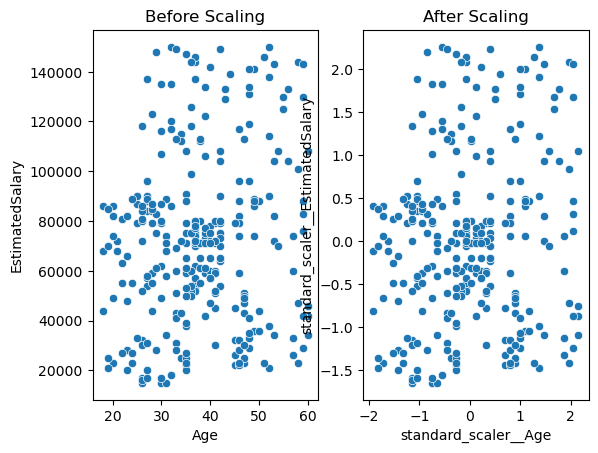

In [25]:
_, (first, second) = plt.subplots(ncols=2)
sns.scatterplot(data=X_train, x="Age", y="EstimatedSalary", ax=first).set_title(
    "Before Scaling"
)
sns.scatterplot(
    data=X_train_trans,
    x="standard_scaler__Age",
    y="standard_scaler__EstimatedSalary",
    ax=second,
).set_title("After Scaling")

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

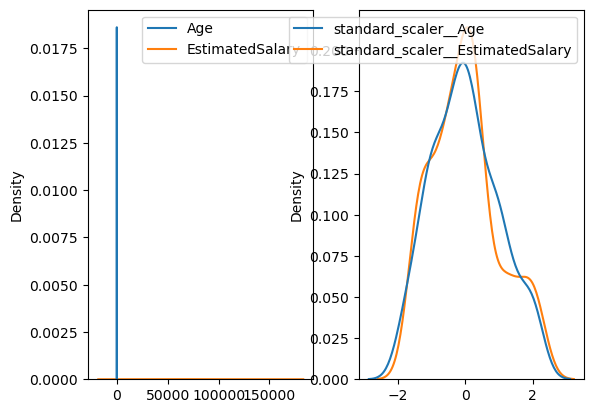

In [46]:
_, (first, second) = plt.subplots(ncols=2)
sns.kdeplot(data=X_train[["Age", "EstimatedSalary"]], ax=first)
sns.kdeplot(
    data=X_train_trans[["standard_scaler__Age", "standard_scaler__EstimatedSalary"]],
    ax=second,
)

---

**The distribution of the data does not change after applying standard scaler**


d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Axes: xlabel='standard_scaler__EstimatedSalary', ylabel='Density'>

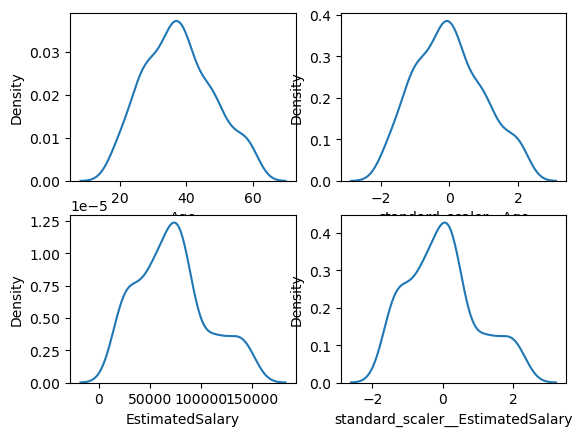

In [48]:
_, ((first, second), (third, fourth)) = plt.subplots(ncols=2, nrows=2)
sns.kdeplot(data=X_train, x="Age", ax=first)
sns.kdeplot(
    data=X_train_trans,
    x="standard_scaler__Age",
    ax=second,
)
sns.kdeplot(data=X_train, x="EstimatedSalary", ax=third)
sns.kdeplot(
    data=X_train_trans,
    x="standard_scaler__EstimatedSalary",
    ax=fourth,
)

---


### **2. Normalization**


Normalization is useful when the units of data are different for each column.
Normalizes the data between 0 and 1.


#### 1. MinMax Scaling

<img src="../assets/minmax_scaler.png" alt="minmax_scaler" />


Generally used when the data is known to be bounded between some min and some max quantities, like in image processing where a pixel is [0, 255].


In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
path = os.path.join("..", "data", "wine_data.csv")
df = pd.read_csv(path, usecols=[0, 1, 2], header=None)
df.columns = ["Class label", "Alcohol", "Malic acid"]
df.sample(2)

,Class label,Alcohol,Malic acid
97,2,12.29,1.41
30,1,13.73,1.50


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Class label", axis=1), df["Class label"]
)

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [("minmax", MinMaxScaler(), ["Alcohol", "Malic acid"])], remainder="passthrough"
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmax', MinMaxScaler(),
                                 ['Alcohol', 'Malic acid'])])

In [20]:
X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.transform(X_test)

In [21]:
X_test_trans.sample(2)

,minmax__Alcohol,minmax__Malic acid
99,0.331579,0.494908
93,0.331579,0.425662


<Axes: xlabel='minmax__Alcohol', ylabel='minmax__Malic acid'>

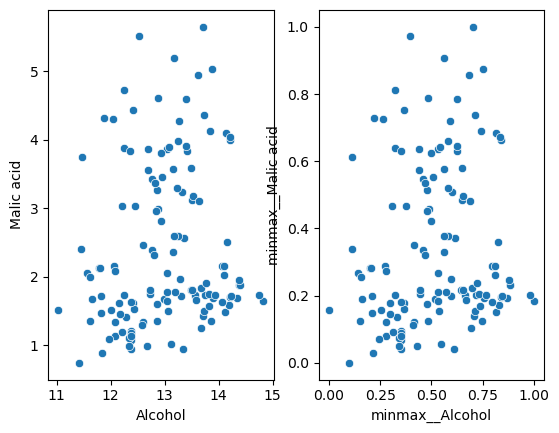

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, (first, second) = plt.subplots(ncols=2)
sns.scatterplot(X_train, x="Alcohol", y="Malic acid", ax=first)
sns.scatterplot(X_train_trans, x="minmax__Alcohol", y="minmax__Malic acid", ax=second)

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

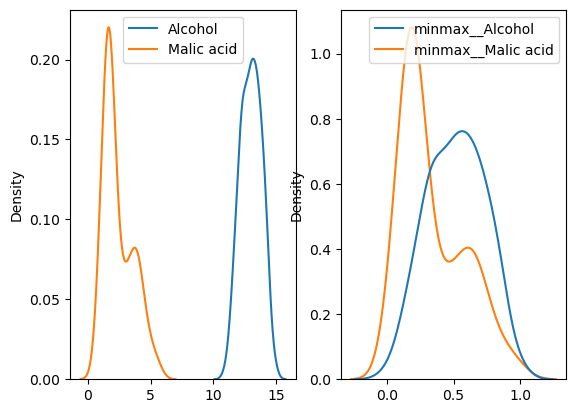

In [26]:
figure, (first, second) = plt.subplots(ncols=2)

sns.kdeplot(X_train[["Alcohol", "Malic acid"]], ax=first)
sns.kdeplot(X_train_trans[["minmax__Alcohol", "minmax__Malic acid"]], ax=second)

---


#### 2. MaxAbs Scaling

<img src="../assets/maxabs_scaler.png" alt="maxabs__scaler"/>


Maxabs scaler scales the values between -1 and 1.
It is generally used when the data is origin centered or is sparse.

---


#### 3. Robust Scaling

<img src="../assets/robust_scaler.png" />


Used when the data has outliers or is skewed.
